# ML HW1
### 106598018 萬俊瑋

**1. It is known that the HIV test has only 0.1% of false positive and false negative, respectively. However, for a specific group of people, the prevalence of HIV positive rate is 0.01 %. If a person belongs to such a group and is found to be positive in the HIV test, find the probability that the person is really infected.**

>| **TP 99.9%** | **FP 0.1%**  |
>| ------------ | ------------ |
>| **FN 0.1%**  | **TN 99.9%** |
>
>For the sicker in group =0.01%  
>0.01%*99.9%/(0.01%*99.9%+99.99%*0.1%)=0.090834……≒9.1%

**2. UC Irvine has a large repository for various kinds of data. In this problem, you are asked to use the iris dataset (https://archive.ics.uci.edu/ml/datasets/Iris) to perform the experiments. Implement the k-NN classifier for the classification task. To begin one experiment, randomly draw 70 % of the instances for training and the rest for testing. Repeat the drawing and the k-NN classification 10 times and compute the average accuracy. Then, plot the curve of k versus accuracy for k = 1, 3, ..., 15. For simplicity, use the Euclidean distance in your computation.**

> It seems that the best “k” is 13.

In [ ]:
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import random

# global
MAX_K = 15
seed = []
for i in range(10):
    seed.append(random.randint(0,99))

# Load dataset
iris = datasets.load_iris()

# create model
result = []
for k in range(1, MAX_K+1, 2):
    acc = 0
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                            random_state=seed[i])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc+=metrics.accuracy_score(y_test, y_pred)
    result.append(acc/10)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), result, 'ob--', label = 'Test set')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()

**3. Following problem 2, if you do not have the test dataset (i.e., you have only the 70 % of dataset), how do you determine the optimal value of k? Use your own approach to find such a value and compare the results you have in problem 2. Comment on your results.**

> I use the 70% subset-data of origin data to spilt into 70% training set and 30% test set again, and run the KNN >again to compare the result.The best “ks” in origin data are 9, 11 and 15, and in subset are 3 and 11. I run the >same code in many times, I found the results are different in every time.

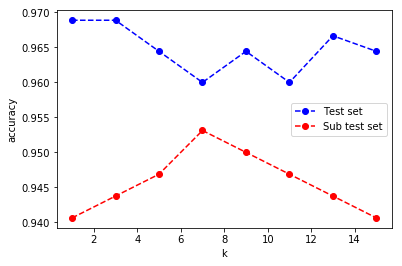

In [2]:
# perameters
MAX_K = 15
seed = []
for i in range(10):
    seed.append(random.randint(0,99))

# Load dataset
iris = datasets.load_iris()

# create model
result, result_subset = [], []
for k in range(1, MAX_K+1, 2):
    acc, acc_subset = 0, 0
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                            random_state=seed[i])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc+=metrics.accuracy_score(y_test, y_pred)
        # spilt subset data randomly
        X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_train, y_train, test_size = 0.3,
                                                                            random_state=seed[i])
        knn.fit(X_sub_train, y_sub_train)
        y_sub_pred = knn.predict(X_sub_test)
        acc_subset+=metrics.accuracy_score(y_sub_test, y_sub_pred)
    result.append(acc/10)
    result_subset.append(acc_subset/10)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), result, 'ob--', label = 'Test set')
plt.plot(range(1, MAX_K+1, 2), result_subset, 'or--', label = 'Sub test set')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()

**4. In the class, we covered the naive Bayes classifier, but only with discrete-type features. Consult any paper to learn how to extend this approach to continuous-type features. Explain your finding as an algorithm.**

> [Estimating Continuous Distributions in Bayesian Classifiers](https://arxiv.org/ftp/arxiv/papers/1302/1302.4964.pdf)  
>We assume the feather of iris is normal distirbution, so we can do the naïve bayes classify via:  
>Because we assume iris data is normal distirbution, we can get:  
>And, we can compute each probility of x in different class.

**5. Repeat problem 2 with your algorithm in problem 4. Compare the accuracy of naive Bayes classifier with the k-NN.**

> I found that most of time knn is beter than Gaussian Naive Bayes when k is big enough.

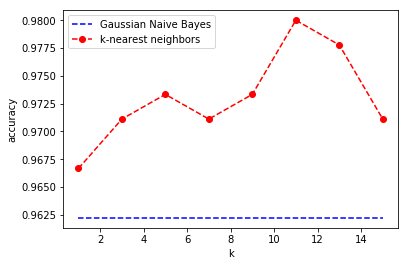

In [3]:
from sklearn.naive_bayes import GaussianNB

# global
MAX_K = 15
seed = []
for i in range(10):
    seed.append(random.randint(0,99))

# Load dataset
iris = datasets.load_iris()

# create Gaussian Naive Bayes model
acc = 0
for i in range(10):
    # spilt data randomly
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                        random_state=seed[i])
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc+=metrics.accuracy_score(y_test, y_pred)
result_gnb = acc/10

# create model
result_knn = []
for k in range(1, MAX_K+1, 2):
    acc = 0
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                            random_state=seed[i])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc+=metrics.accuracy_score(y_test, y_pred)
    result_knn.append(acc/10)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), [result_gnb for i in range(1, MAX_K+1, 2)], 'b--', label = 'Gaussian Naive Bayes')
plt.plot(range(1, MAX_K+1, 2), result_knn, 'or--', label = 'k-nearest neighbors')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()